In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/AI/Flower

/content/drive/MyDrive/AI/Flower


In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/Flower/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 4830 images belonging to 5 classes.


In [5]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/Flower/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1575 images belonging to 5 classes.


In [6]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [7]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 20 lần học (epochs), mỗi lần học thì chỉ học␣256 dữ liệu (batch_size)
history=model.fit(training,epochs=20,batch_size=256,verbose=1, validation_data=validation)

Epoch 1/20
151/151 [==============================] - 2684s 18s/step - loss: 1.2095 - accuracy: 0.4679 - val_loss: 0.8910 - val_accuracy: 0.6629
Epoch 2/20
151/151 [==============================] - 75s 500ms/step - loss: 0.8213 - accuracy: 0.6756 - val_loss: 0.9193 - val_accuracy: 0.5517
Epoch 3/20
151/151 [==============================] - 77s 506ms/step - loss: 0.7236 - accuracy: 0.7222 - val_loss: 0.8302 - val_accuracy: 0.6311
Epoch 4/20
151/151 [==============================] - 77s 510ms/step - loss: 0.6500 - accuracy: 0.7497 - val_loss: 0.6330 - val_accuracy: 0.7594
Epoch 5/20
151/151 [==============================] - 75s 497ms/step - loss: 0.5831 - accuracy: 0.7774 - val_loss: 0.5686 - val_accuracy: 0.8044
Epoch 6/20
151/151 [==============================] - 76s 507ms/step - loss: 0.5553 - accuracy: 0.7963 - val_loss: 0.5911 - val_accuracy: 0.7702
Epoch 7/20
151/151 [==============================] - 75s 501ms/step - loss: 0.4887 - accuracy: 0.8201 - val_loss: 0.4402 - val_ac

In [8]:
# Lưu 
model.save("Flower_VN.h5")
model_1=load_model('Flower_VN.h5')

In [9]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.1937018483877182
Train Accuracy 0.9341614842414856


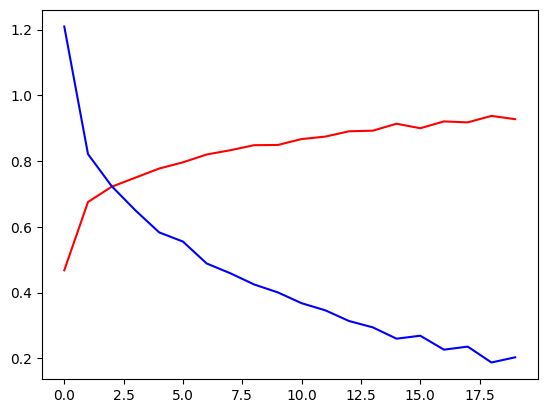

In [10]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 0s 22ms/step
Daisy


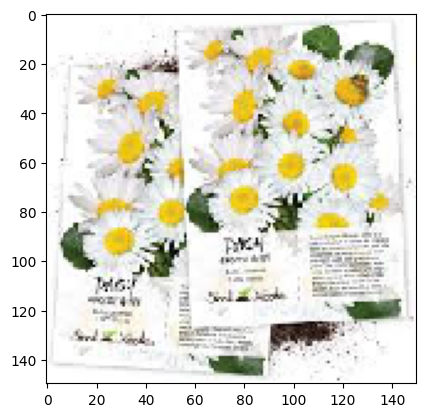

1/1 [==============================] - 0s 20ms/step
Daisy


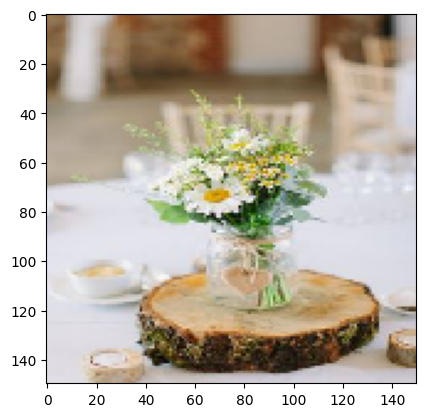

1/1 [==============================] - 0s 21ms/step
Lotus


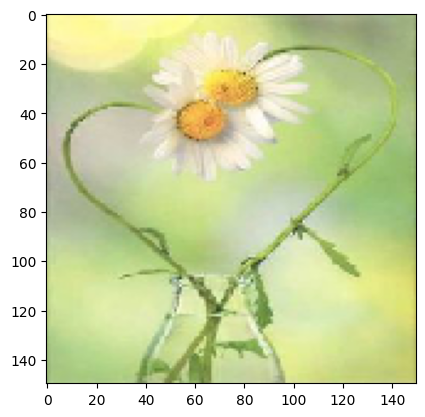

1/1 [==============================] - 0s 20ms/step
Lotus


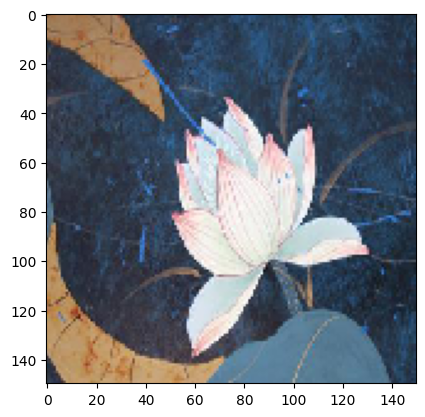

1/1 [==============================] - 0s 21ms/step
Rose


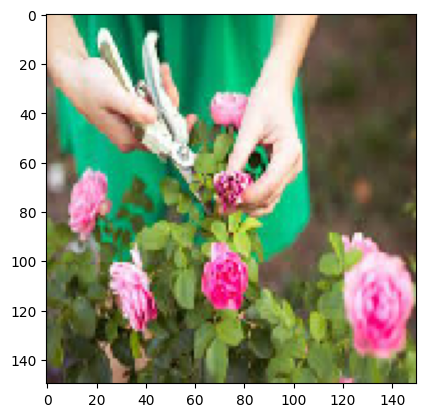

1/1 [==============================] - 0s 21ms/step
Rose


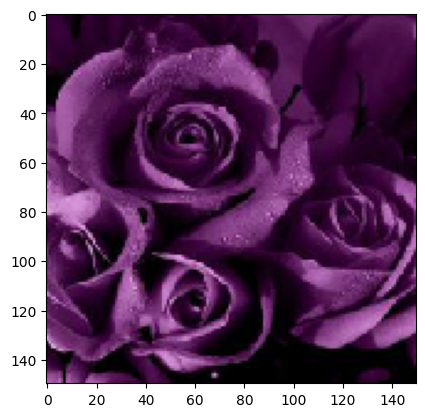

1/1 [==============================] - 0s 26ms/step
Lotus


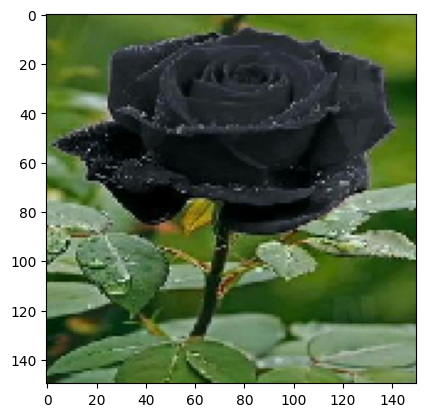

1/1 [==============================] - 0s 21ms/step
Lotus


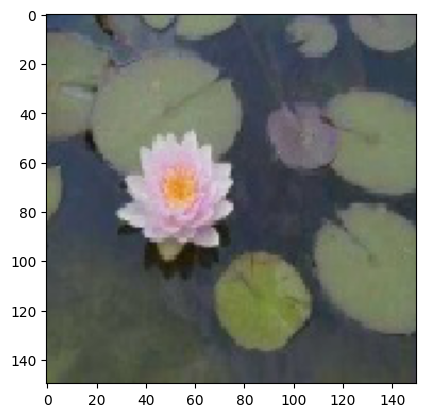

1/1 [==============================] - 0s 18ms/step
Lotus


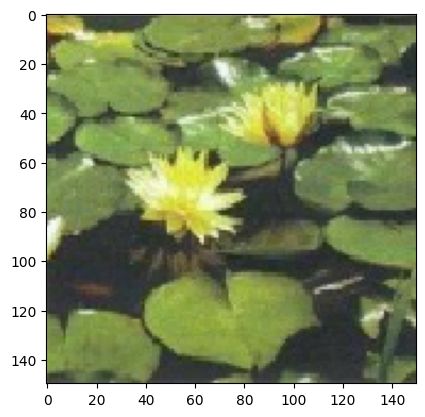

1/1 [==============================] - 0s 24ms/step
Rose


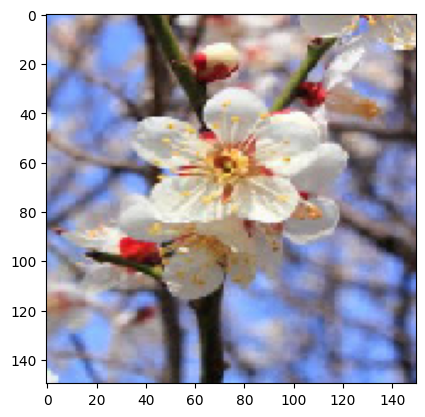

1/1 [==============================] - 0s 26ms/step
Apricot


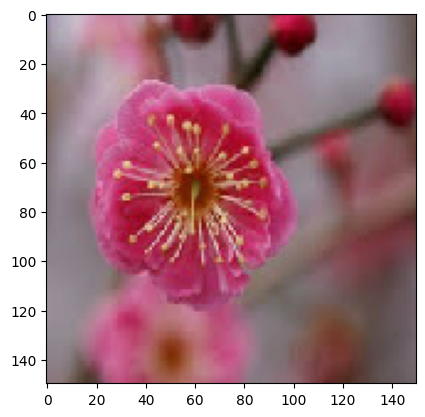

1/1 [==============================] - 0s 22ms/step
Rose


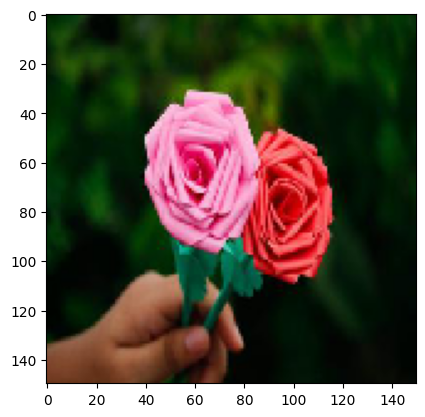

1/1 [==============================] - 0s 26ms/step
Rose


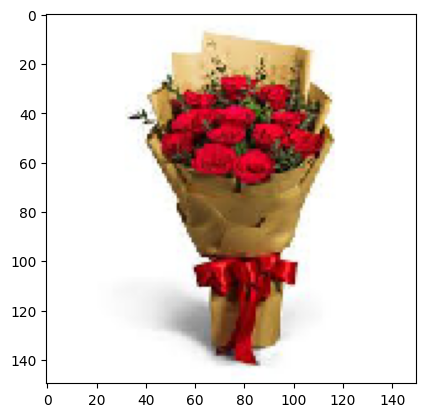

In [12]:
test="/content/drive/MyDrive/AI/Flower/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Apricot','Daisy','Lotus','Rose','WaterLily']
  print(class_name[result])
  plt.show()